In [5]:
%gui qt5
from aicsimageio import AICSImage, imread
from matplotlib_scalebar import scalebar as sb
from ScanImageTiffReader import ScanImageTiffReader

import numpy as np
import napari
import matplotlib.pyplot as plt

In [6]:
# Offset correction
def returnOffsetCorr(movie):
    if np.min(movie)<0:
        movie = movie - np.min(movie)
    return movie


In [7]:
# Change output figure size
# ...needs to be in its own cell for some reason...

plt.rcParams['figure.figsize'] = [16, 10]

In [24]:
FILE = '/mnt/5404b8a5-71b7-4464-9a1e-b40cd26fac58/Data_Drive/GluSnFr3_Project/GluSnfr3_210211/PDGFR (72hrs)/stack.tif'

image = imread(FILE)

# Pull meta-data from the file    
metadata=ScanImageTiffReader(FILE).metadata()
metadata_dict = {}
metadata = metadata.split("\n")
for data in metadata:
    temp = data.split(" = ")
    if len(temp) > 1:
        metadata_dict[temp[0]] = temp[1]
        
        
# Saving the zoom of the factor      
ZOOM = metadata_dict['SI.hRoiManager.scanZoomFactor']
print('Image Zoom Facter: ', ZOOM)

# PIXEL VALUE IN REAL WORLD MEASUREMENTS (um)
PX = 0.31640625/int(ZOOM) 



print(image.shape)
image = image[0,0,0,:,:,:]
print(image.shape)

corrected_image = returnOffsetCorr(image)

Image Zoom Facter:  3
(1, 1, 1, 25, 512, 512)
(25, 512, 512)


In [11]:
test = napari.Viewer()
test.add_image(corrected_image, name='Ch1', scale=(5, 1, 1), colormap='green', blending='additive')

<Image layer 'Ch1' at 0x7ff1a32fe358>

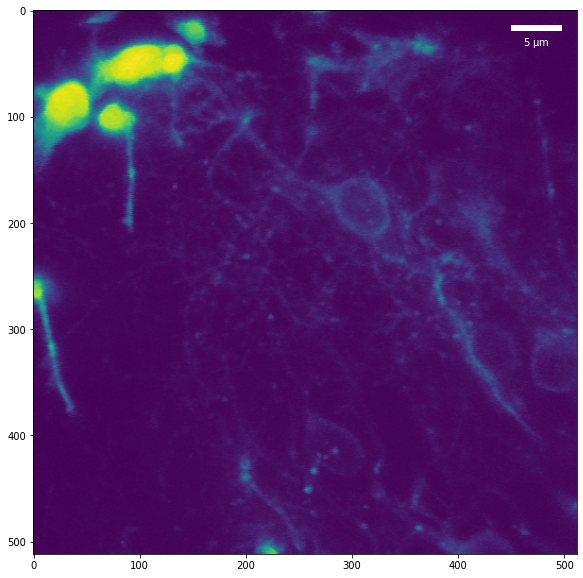

In [23]:
scalebar = sb.ScaleBar(
    PX,
    "um",
    box_color =None,
    box_alpha=0,
    length_fraction=.1,
    scale_loc="bottom",
    border_pad=1,
    pad=.5,
    color='white'
)
fig, ax = plt.subplots()

ax.add_artist(scalebar)
ax.imshow(np.std(corrected_image, axis=0))
plt.show()

In [12]:
ch1= np.zeros((int(image.shape[0]/2),512,512))
ch1_count=0
ch2= np.zeros((int(image.shape[0]/2),512,512))
ch2_count=0

for i in range(image.shape[0]):
    if i%2 == 0:
        ch1[ch1_count, :, :] = image[i, :, :]
        ch1_count+=1
    else:
        ch2[ch2_count, :, :] = image[i, :, :]
        ch2_count+=1
    

IndexError: index 12 is out of bounds for axis 0 with size 12

In [13]:
ch1 = returnOffsetCorr(ch1)
ch2 = returnOffsetCorr(ch2)

In [14]:
test = napari.Viewer()
test.add_image(ch1, name='Ch1', scale=(2.5, 1, 1), colormap='red', blending='additive')
test.add_image(ch2, name='Ch2', scale=(2.5, 1, 1), colormap='green', blending='additive')

<Image layer 'Ch2' at 0x7ff100f897f0>

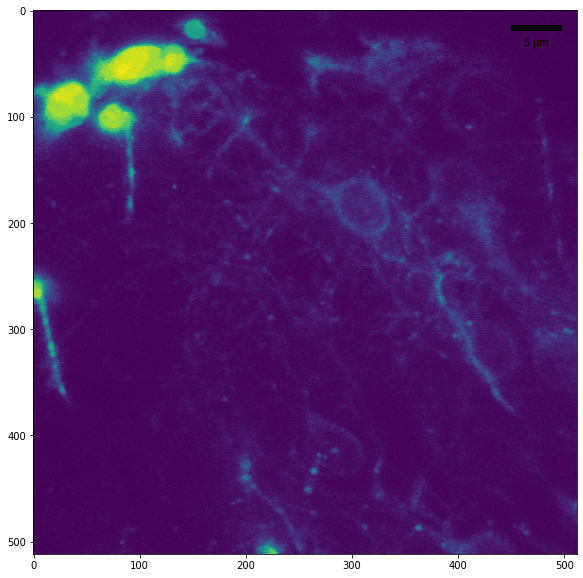

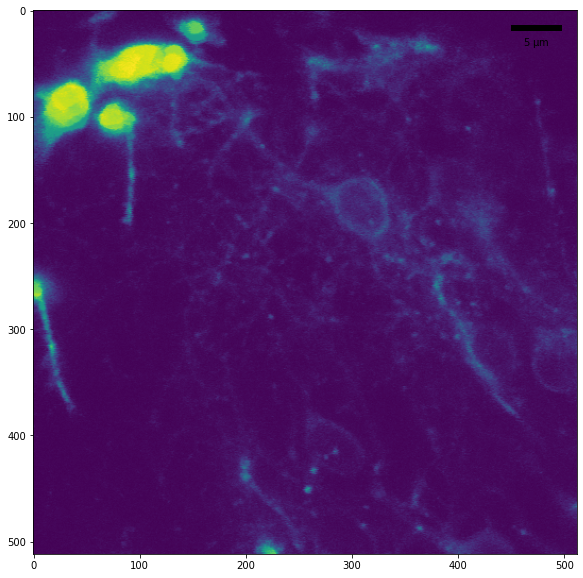

In [17]:
scalebar = sb.ScaleBar(
    PX,
    "um",
    box_color =None,
    box_alpha=0,
    length_fraction=0.1,
    scale_loc="bottom",
    border_pad=1,
    pad=.5
)
fig, ax = plt.subplots()

ax.add_artist(scalebar)
ax.imshow(np.std(ch1, axis=0))
plt.show()


scalebar = sb.ScaleBar(
    PX,
    "um",
    box_color =None,
    box_alpha=0,
    length_fraction=0.1,
    scale_loc="bottom",
    border_pad=1,
    pad=.5
)
fig, ax = plt.subplots()
ax.add_artist(scalebar)
ax.imshow(np.std(ch2, axis=0))
plt.show()